
# E-Commerce Dataset Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis (EDA) for the e-commerce dataset. The dataset consists of transactional data that includes information about invoices, products, prices, quantities, and customer details.

## Dataset Columns
- **InvoiceNo**: Unique identifier for each transaction.
- **StockCode**: Unique identifier for each product.
- **Description**: Name of the product.
- **Quantity**: Number of units of the product per transaction.
- **InvoiceDate**: Date and time of the transaction.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country where the customer resides.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '..\data\data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information
df.info()

# Display the first few rows
df.head()


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\2220066881.py:6: SyntaxWarning: invalid escape sequence '\d'
  file_path = '..\data\data.csv'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Drop rows with missing CustomerID
df_cleaned = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Convert CustomerID to integer
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

# Verify changes
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\1827043893.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\1827043893.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)


In [9]:

# Summary statistics of the numeric columns
df_cleaned.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303



## Data Visualization

### 1. Distribution of `Quantity` and `UnitPrice`


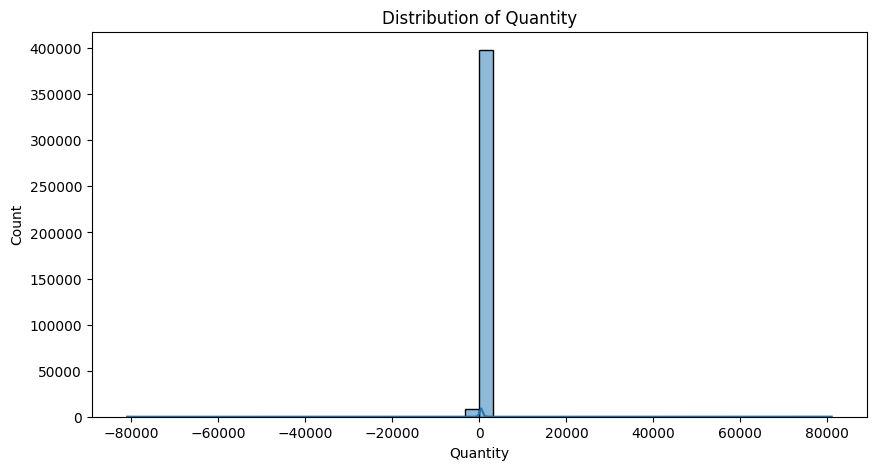

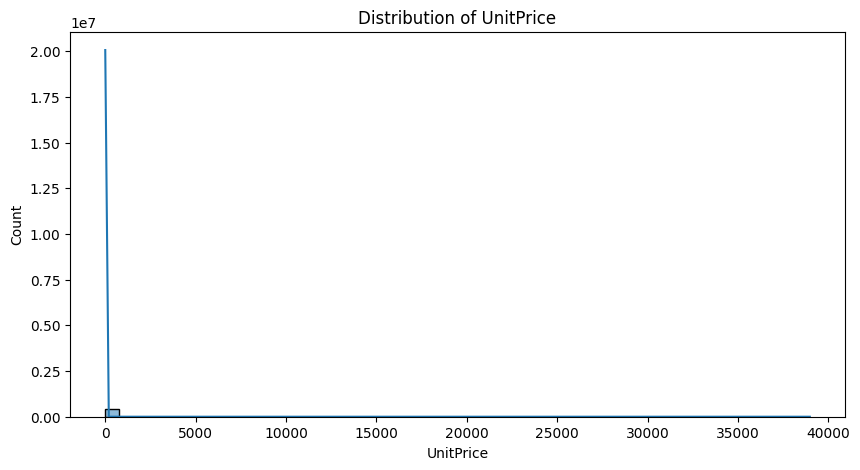

In [10]:

# Distribution of Quantity
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

# Distribution of UnitPrice
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.show()



### 2. Time Series Analysis of `InvoiceDate`


C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\2871516996.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned['Quantity'].resample('M').sum().plot(figsize=(15, 6))


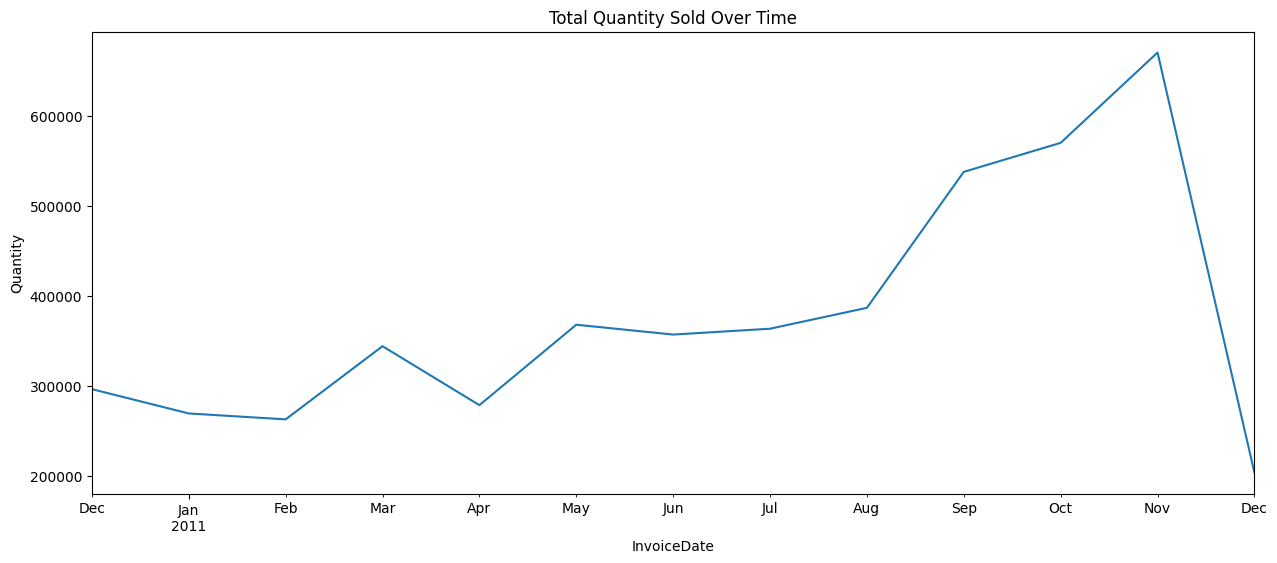

In [11]:

# Time series analysis of sales over time
df_cleaned.set_index('InvoiceDate', inplace=True)
df_cleaned['Quantity'].resample('M').sum().plot(figsize=(15, 6))
plt.title('Total Quantity Sold Over Time')
plt.ylabel('Quantity')
plt.show()



### 3. Analysis of Categorical Variables (`Country`, `StockCode`)


C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\3712777888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


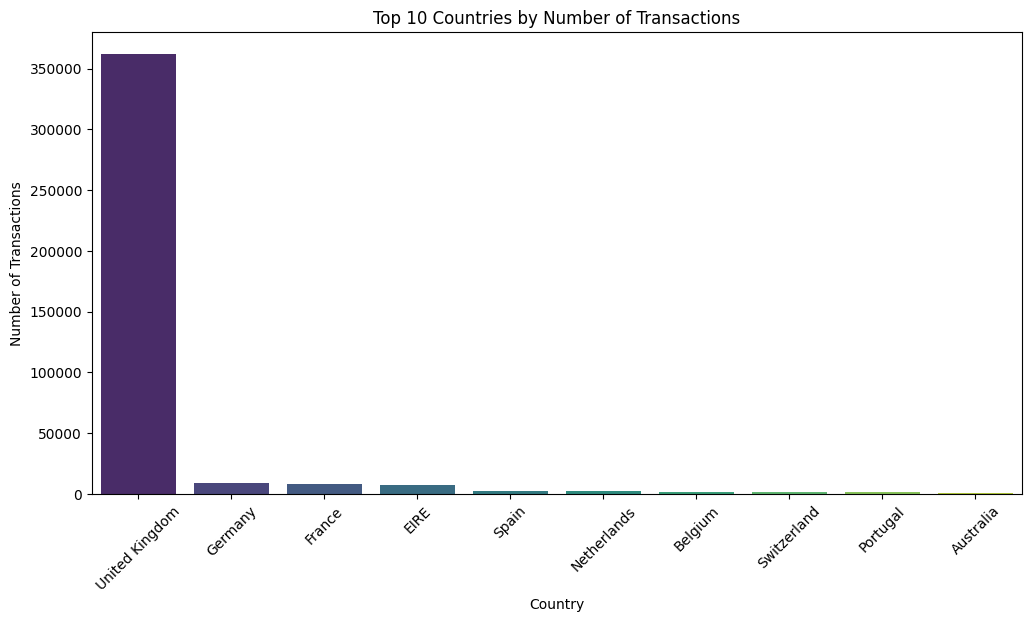

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\3712777888.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='magma')


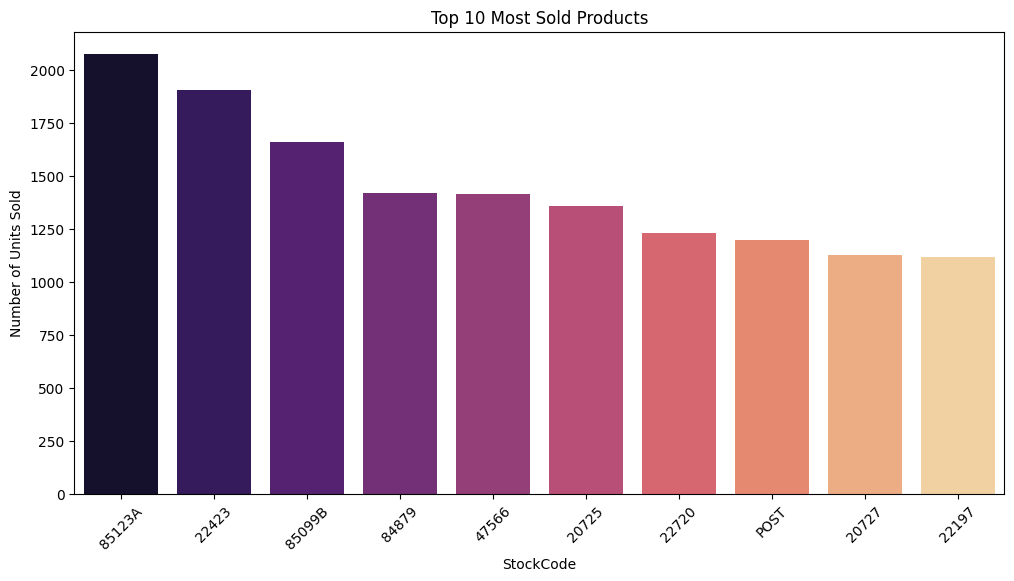

In [12]:

# Top 10 countries by number of transactions
top_countries = df_cleaned['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Top 10 most sold products
top_products = df_cleaned['StockCode'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='magma')
plt.title('Top 10 Most Sold Products')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Handling Missing Values
# Dropping rows where CustomerID is missing
df_cleaned = df.dropna(subset=['CustomerID'])

# Fill missing Description with 'Unknown'
df_cleaned['Description'].fillna('Unknown', inplace=True)

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\3073027451.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Description'].fillna('Unknown', inplace=True)
C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\3073027451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Description'].fillna('Unknown', inplace=True)

In [19]:
# Data Type Conversion
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\2256136444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\2256136444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)


In [20]:
# Feature Engineering: Creating TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Extracting Date Features
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\2856283327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\2856283327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\2856283327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [21]:
# Handling Categorical Data: One-hot encoding for Country
df_encoded = pd.get_dummies(df_cleaned, columns=['Country'])

In [22]:
# Outlier Detection and Removal: Using IQR method for Quantity
Q1 = df_cleaned['Quantity'].quantile(0.25)
Q3 = df_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_cleaned[~((df_cleaned['Quantity'] < (Q1 - 1.5 * IQR)) | (df_cleaned['Quantity'] > (Q3 + 1.5 * IQR)))]

In [23]:
# Normalization: Scaling UnitPrice and TotalPrice
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_no_outliers[['UnitPrice', 'TotalPrice']] = scaler.fit_transform(df_no_outliers[['UnitPrice', 'TotalPrice']])


C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_27136\4133806786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[['UnitPrice', 'TotalPrice']] = scaler.fit_transform(df_no_outliers[['UnitPrice', 'TotalPrice']])


In [24]:
# Final Check
df_no_outliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,0.000065,17850,United Kingdom,0.827489,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,0.000087,17850,United Kingdom,0.827596,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,0.000071,17850,United Kingdom,0.827632,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,0.000087,17850,United Kingdom,0.827596,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,0.000087,17850,United Kingdom,0.827596,2010,12,1,8


## Correlation Analysis


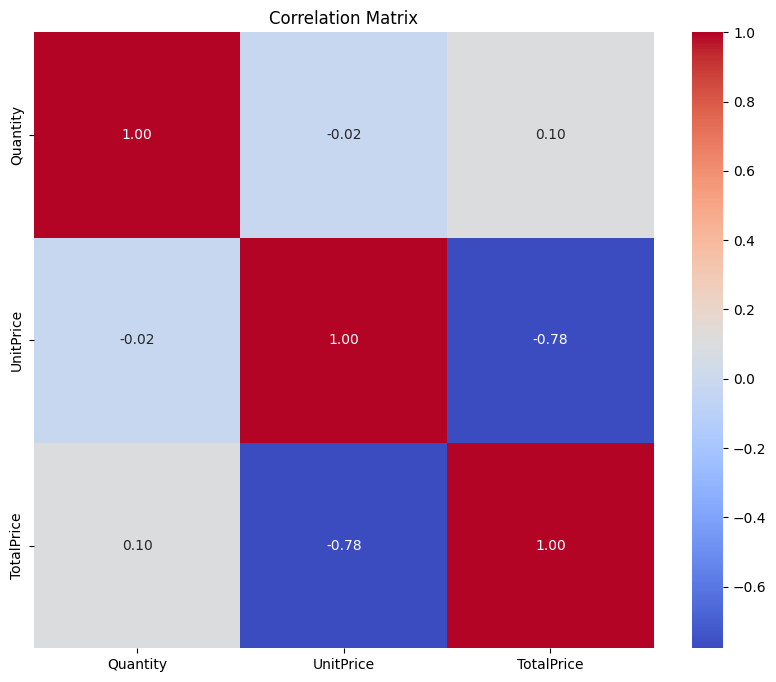

In [25]:
# Correlation Matrix (for numeric columns only)
numeric_cols = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_no_outliers[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Example file path
final_file_path = '../data/final_data.csv'

# Save the DataFrame
df_no_outliers.to_csv(final_file_path, index=False)

print(f"Final preprocessed data saved to {final_file_path}")

Final preprocessed data saved to ../data/final_data.csv
